# Preliminaries

### Defining polinomials using numpy 

In [3]:
from numpy import poly1d

p1 = poly1d([1,200,1000])         # y=x^2 + 200x + 1000
print(p1)

p2 = poly1d([10,0,0])             # y=10x^2
print(p2)

p3 = poly1d([0.00001,0,-0.0025,1,-80,0,0])/500  #some polinomial of degree 6
print(p3)

   2
1 x + 200 x + 1000
    2
10 x
       6         4         3        2
2e-08 x - 5e-06 x + 0.002 x - 0.16 x


In [4]:
p3(4)

-2.43319808

### Plotting with matplotlib

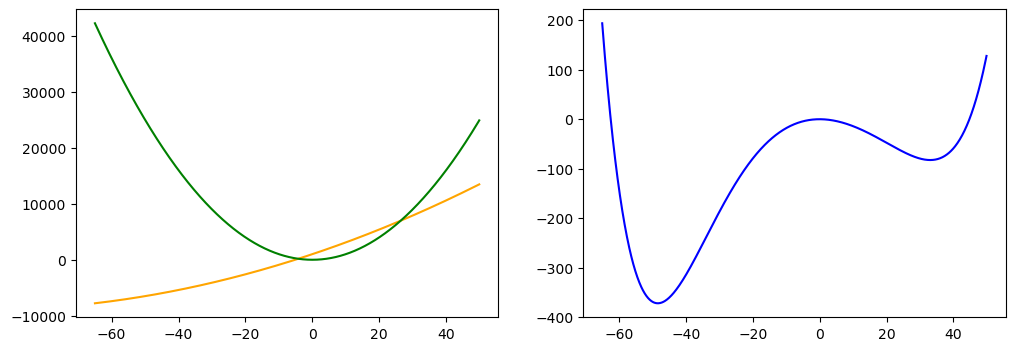

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-65.0, 50.0, 0.1)

fig, (ax12,ax3) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))


y1 = p1(x)
ax12.plot(x, y1, color="orange")

y2 = p2(x)
ax12.plot(x, y2, color="green")

y3 = p3(x)
ax3.plot(x, y3, color="blue")

plt.show()

### Polinomial derivative with numpy 

         5         3         2
1.2e-07 x - 2e-05 x + 0.006 x - 0.32 x


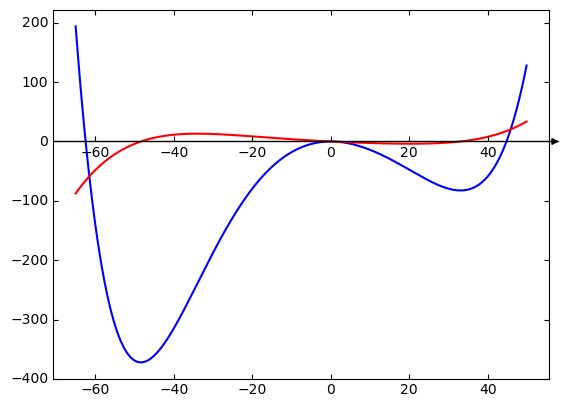

In [8]:
from mpl_toolkits.axisartist.axislines import SubplotZero


dp3dx=np.polyder(p3,m=1)  #same as p3.deriv()
print(dp3dx)

def draw_x():
    fig = plt.figure()
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)
    ax.axis["xzero"].set_axisline_style("-|>")
    ax.axis["xzero"].set_visible(True)

draw_x()
# for direction in ["left", "right", "bottom", "top"]:
#     # hides borders
#     ax.axis[direction].set_visible(False)


plt.plot(x, p3(x)   , color="blue")
plt.plot(x, dp3dx(x) , color="red")
plt.show()

# Extrema finding 

Find a minima of p3

## Bisection

To find an extrema using bisection, we search for a derivative of zero. There is negative as we approach a minima from left and positive derivative as we approach the minima from right. Thus, the initial interval should start at a negative derivative and end at a positive derivative.      

In [11]:
from random import random
low = -65
high= 50
e = 0.001
a = random()*(high-low)+low
b = random()*(high-a)+a

ei = [abs(b-a)/2]

while not (dp3dx(a)<0 and dp3dx(b)>0): 
    a = random()*(high-low)+low
    b = random()*(high-a)+a
iterations=[a,b]
while not abs(b-a)<2*e:
    z = 0.5*(a+b)
    iterations.append(z)
    if dp3dx(a)*dp3dx(z)<0:
        b = z
    else:
        a = z
    ei.append(abs(b-a)/2)
    z = 0.5*(a+b)
print(z)

33.066627578265326


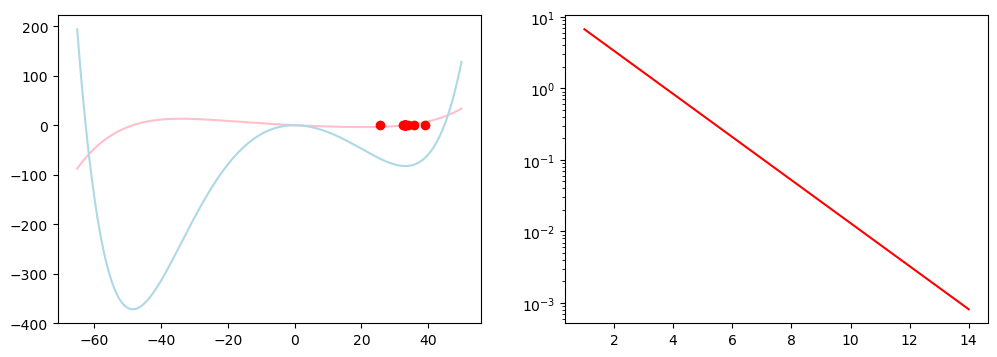

In [12]:
fig, (axp,axe) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))

axp.plot(x, dp3dx(x) , color="pink")
axp.plot(x, p3(x) , color="lightblue")
axp.plot(iterations,[0]*len(iterations),"o",color="red")


axe.semilogy(range(1,len(ei)+1), ei , color="red")

plt.show()

## Fixed point

Fixed point iterations over the p3 derivativ to find extrema. 

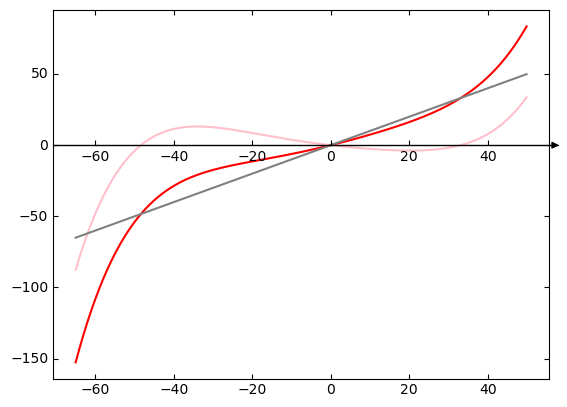

In [14]:
g = poly1d([+1,0]) + dp3dx
draw_x()
#plt.plot(x, p3(x) , color="lightblue")
plt.plot(x, dp3dx(x) , color="pink")
plt.plot(x, g(x) , color="red")
plt.plot(x, x, color="grey")
plt.show()

In [15]:
e = 0.01
x0 = -47 #random()*(high-low)+low
xi = [x0, g(x0)]
ei = [abs(xi[-1]-xi[-2])]

while abs(xi[-1]-xi[-2])>=e: 
    xi.append(g(xi[-1]))
    ei.append(abs(xi[-1]-xi[-2]))
print(xi[-1])
print(xi)

-0.020139284785197168
[-47, -44.150940840000004, -36.737261053294674, -23.92194000329438, -13.499649482936976, -8.090916180373787, -5.1026130862298285, -3.3113149287894332, -2.185226926806538, -1.4571002907428798, -0.978028265752148, -0.6593013819142471, -0.44571115309690795, -0.3018898647391597, -0.20473773311124321, -0.13896998168061733, -0.09438365793660138, -0.06412742093256339, -0.04358196700332311, -0.029624339579610137, -0.020139284785197168]


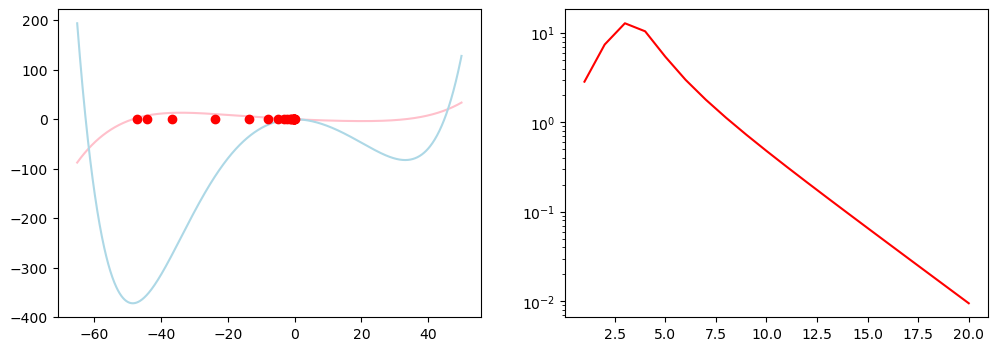

In [16]:
fig, (axp,axe) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))

#plt.plot(x, p3(x)   , color="lightblue")
axp.plot(x, dp3dx(x) , color="pink")
axp.plot(x, p3(x) , color="lightblue")
axp.plot(xi,[0]*len(xi),"o",color="red")

axe.semilogy(range(1,len(ei)+1), ei , color="red")

plt.show()

## Newton (-Raphson)

Newton (-Raphson) fixed point iterations over the p3 derivativ to find extrema. Second derivative is required for computation, third derivative should be continuouse near the extrema for convergence. When Newton algoroithm is used to find a root second derivative need to be continuouse near the root for the method to converge.  

In [18]:
e = 0.0001
x0 = random()*(high-low)+low
xi = [x0]
ei = [abs(dp3dx(xi[-1]))]

ddp3 = dp3dx.deriv()

while abs(dp3dx(xi[-1]))>=e:
    nextx = xi[-1] - dp3dx(xi[-1])/ddp3(xi[-1])
    xi.append(nextx)
    ei.append(abs(dp3dx(xi[-1])))
print(xi[-1])
print(xi)

33.066852693567036
[46.7919437729561, 39.07972390944944, 34.68495014342287, 33.218656294912634, 33.068334949734876, 33.066852693567036]


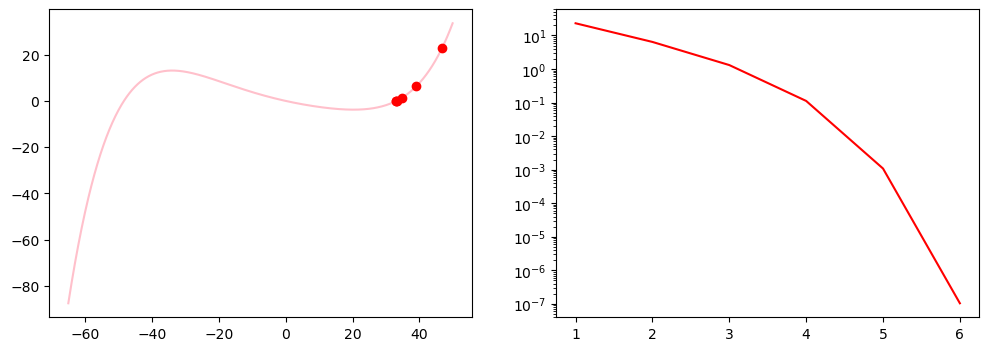

In [19]:
fig, (axp,axe) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))

axp.plot(x, dp3dx(x) , color="pink")
axp.plot(xi,dp3dx(xi),"o",color="red")

axe.semilogy(range(1,len(ei)+1), ei , color="red")

plt.show()

## Gradient Descent

In [21]:
learning_rate = 1 

e = 0.0001
x0 = random()*(high-low)+low
xi = [x0]
ei = [abs(dp3dx(xi[-1]))]

while abs(dp3dx(xi[-1]))>=e:
    nextx = xi[-1] - dp3dx(xi[-1])*learning_rate
    xi.append(nextx)
    if dp3dx(xi[-1])*dp3dx(xi[-2])<0:
        learning_rate/=2
    ei.append(abs(dp3dx(xi[-1])))
print(xi[-1])
print(xi)

-48.372909065275174
[-48.708963001822994, -47.9402563252993, -48.413966177977905, -48.39086249745605, -48.38076511017604, -48.37634142704953, -48.37440136407113, -48.37355013269976, -48.3731765669217, -48.373012611792205, -48.372940650357975, -48.372909065275174]


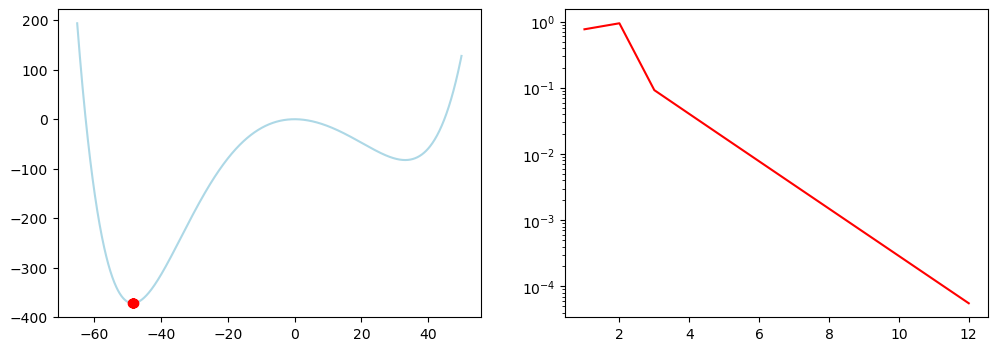

In [22]:
fig, (axp,axe) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))

axp.plot(x, p3(x) , color="lightblue")
axp.plot(xi, p3(xi) ,"o",color="red")

axe.semilogy(range(1,len(ei)+1), ei , color="red")

plt.show()

# Multivariate optimization

Now $\{x_i\}$ is not a series of scalars but series of vectors. 

2D vectors: $\vec{x}_i=(v_1,v_2)$. 

3D vectors: $\vec{x}_i=(v_1,v_2,v_3)$. 

nD vectors: $\vec{x}_i=(v_1,v_2,\ldots,v_n)$.

$f:R^n\rightarrow R$ is a multivariate function. 

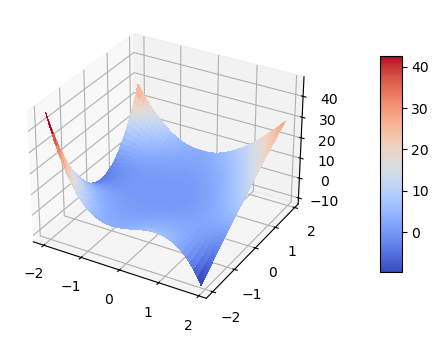

In [24]:
from numpy.polynomial.polynomial import polygrid2d
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

f = [[0, 0, 1, 1],
     [0, 0, 1, 1],
     [1, 1, 1 ,-1]]

# .... f_{i,j}*x^i*y^j ....
# f(x,y) = 0*x^0*y*0 + ... + (-1)*x^2*y^3


x = np.arange(-2.0, 2.0, 0.1)
y = np.arange(-2.0, 2.0, 0.1)
z = polygrid2d(x,y,f)


fig = plt.figure(figsize=plt.figaspect(0.25))
X, Y = np.meshgrid(x, y)
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.7, aspect=10)
plt.show()

## Gradients

[[ 0.  0.  1.  1.]
 [ 2.  2.  2. -2.]]
[[ 0.  2.  3.]
 [ 0.  2.  3.]
 [ 1.  2. -3.]]


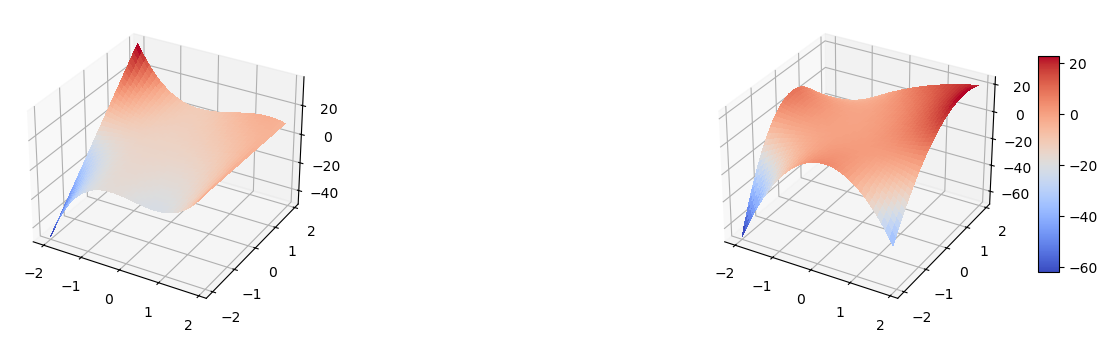

In [26]:
from numpy.polynomial.polynomial import polyval2d
from numpy.polynomial.polynomial import polyder

dfdx = polyder(f,m=1,axis=0)
print(dfdx)
dfdy = polyder(f,m=1,axis=1)
print(dfdy)


X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=plt.figaspect(0.25))


z = polygrid2d(x,y,dfdx)
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

z = polygrid2d(x,y,dfdy)
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.7, aspect=10)
plt.show()

## Multivariate gradient descent

In [28]:
learning_rate = 0.01 

e = 0.0001
x0 = 1.5
xi = [x0]
y0 = 1.5
yi = [y0]
z0 = polyval2d(x0,y0,f)
zi = [z0]

for i in range(500):
    dfdx_i = polyval2d(xi[-1],yi[-1],dfdx)
    dfdy_i = polyval2d(xi[-1],yi[-1],dfdy)
    
    nextx = xi[-1] - dfdx_i*learning_rate
    nexty = yi[-1] - dfdy_i*learning_rate
    
    xi.append(nextx)
    yi.append(nexty)
    zi.append(polyval2d(nextx,nexty,f))
    
    if zi[-1]>zi[-2]:
        learning_rate/=2


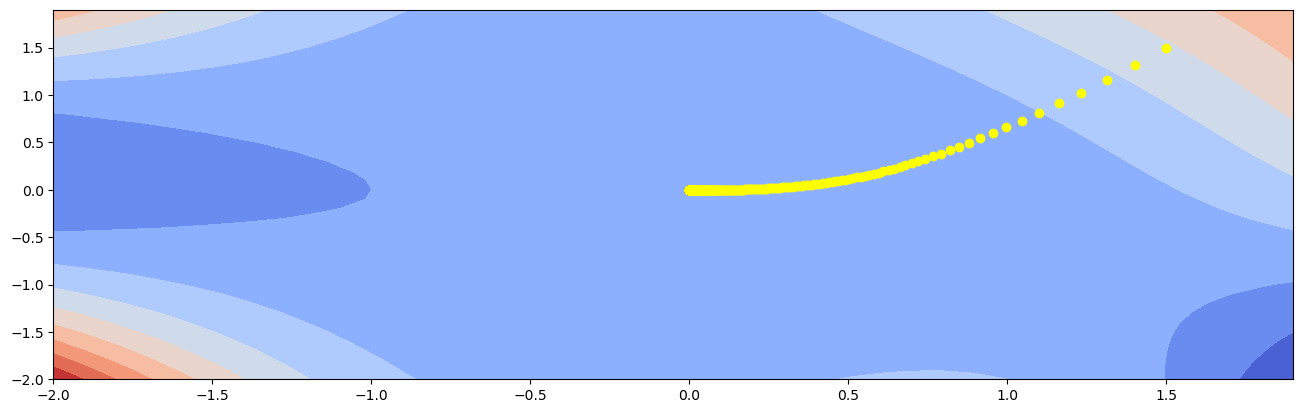

In [29]:
fig = plt.figure(figsize=plt.figaspect(0.3))
X, Y = np.meshgrid(x, y)
z = polygrid2d(x,y,f)
ax = fig.add_subplot(1, 1, 1)
ax.contourf(X, Y, z, 10, cmap=cm.coolwarm, origin="lower")
surf = ax.plot(xi, yi, "o",color="yellow")
plt.show()

In [69]:
learning_rate = 0.01 

momentum = 0.00005

e = 0.0001
x0 = 1.5
xi = [x0]
y0 = 1.5
yi = [y0]
z0 = polyval2d(x0,y0,f)
zi = [z0]

prev_dx = 0
prev_dy = 0

for i in range(400):
    dfdx_i = polyval2d(xi[-1],yi[-1],dfdx)
    dfdy_i = polyval2d(xi[-1],yi[-1],dfdy)
    
    nextx = xi[-1] - dfdx_i*learning_rate - prev_dx
    nexty = yi[-1] - dfdy_i*learning_rate - prev_dy
    
    prev_dx += momentum * dfdx_i
    prev_dy += momentum * dfdy_i
        
    xi.append(nextx)
    yi.append(nexty)
    zi.append(polyval2d(nextx,nexty,f))
    
    if zi[-1]>zi[-2]:
        learning_rate/=2


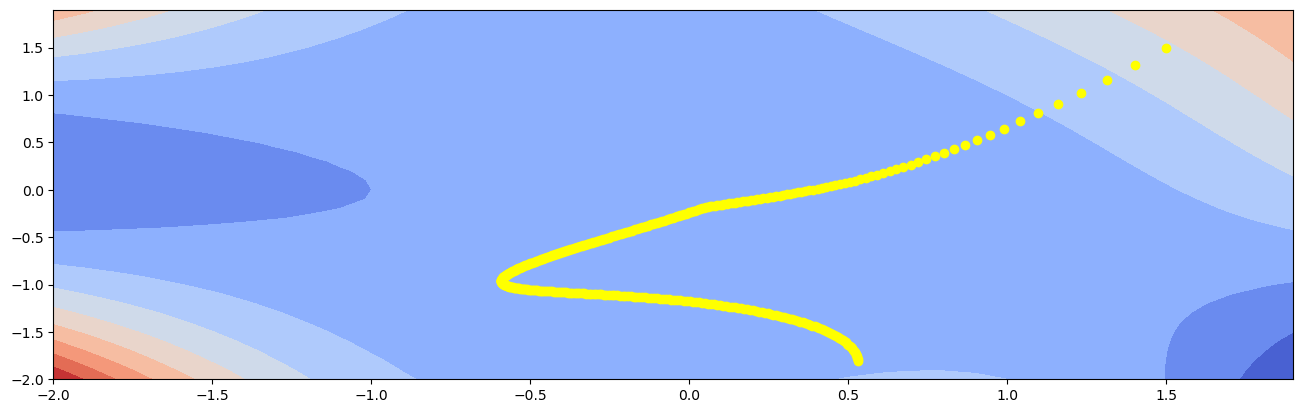

In [71]:
fig = plt.figure(figsize=plt.figaspect(0.3))
X, Y = np.meshgrid(x, y)
z = polygrid2d(x,y,f)
ax = fig.add_subplot(1, 1, 1)
ax.contourf(X, Y, z, 10, cmap=cm.coolwarm, origin="lower")
surf = ax.plot(xi, yi, "o",color="yellow")
plt.show()